In [1]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# **GMM 사용**

In [11]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)
iris_df['GMM_cluster'] = gmm_cluster_labels
iris_df.groupby('target')['GMM_cluster'].value_counts()

target  GMM_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: GMM_cluster, dtype: int64

# **K-Means 사용**

In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
iris_df['KMeans_cluster'] = kmeans_cluster_labels
iris_df.groupby('target')['KMeans_cluster'].value_counts()

target  KMeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: KMeans_cluster, dtype: int64

# **클러스터링 결과 시각화**

In [38]:
def visualize_cluster(clusterobj, dataframe, label_name, iscenter=True):
  if iscenter:
    centers = clusterobj.cluster_centers_

  unique_labels = np.unique(dataframe[label_name].values)
  markers=['o', 's', '^', 'x', '*']
  isNoise=False

  for label in unique_labels:
    label_cluster = dataframe[dataframe[label_name]==label]
    if label == -1:
       cluster_legend = 'Noise'
       isNoise=True
    else :
      cluster_legend = 'Cluster' +str(label)

    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70, edgecolor='k', marker=markers[label], label=cluster_legend)

    if iscenter :
      center_x_y = centers[label]
      plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white', alpha = 0.9, edgecolor='k', marker=markers[label])
      plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
  if isNoise:
    legend_loc = 'upper center'
  else:
    legend_loc = 'upper right'

    plt.legend(loc=legend_loc)
    plt.show()

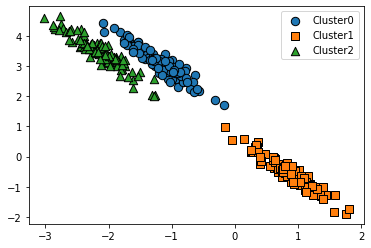

In [39]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster(None, clusterDF, 'target', iscenter = False)

**KMeans 군집화 수행**

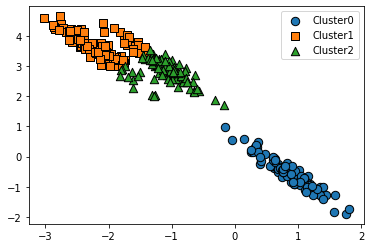

In [43]:
kmeans = KMeans(3)
kmeans_labels = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_labels
visualize_cluster(kmeans, clusterDF, 'kmeans_label', False)

**GMM 군집화 수행**

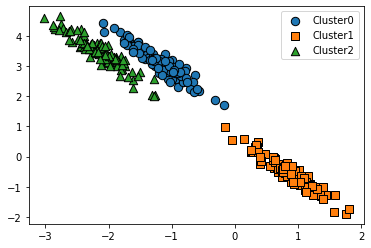

In [44]:
gmm = GaussianMixture(3)
gmm_labels = gmm.fit_predict(X_aniso)
clusterDF['gmm_label'] = gmm_labels
visualize_cluster(gmm, clusterDF, 'gmm_label', False)

**KMeans 와 GMM 비교**

In [42]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       0                73
        2                27
1       1               100
2       2                86
        0                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64
